# Overview
- This file is created by Group 1 from AI1903 for the minicapstone project of AIL303m and CPV301, advised by lecturer Luong Trung Kien.

- This file contains the scripts for training/evaluating Arcface and Retinaface models. Additionally, the script for executing the face recognition system is also included.

# Arcface

## Training

### Downloading data and arrange them in the correct directory

All preprocessing steps are included in the pipeline defined in the 'Arcface/' folder, so no further steps are needed in this notebook.

In [33]:
!pip install -r Arcface/requirement.txt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [6]:
!pip install gdown
import gdown

# File ID from the URL
file_id = "1SXS4-Am3bsKSK615qbYdbA_FMVh3sAvR"
# Construct the direct download URL
url = f"https://drive.google.com/uc?id={file_id}"

# Specify the output file name
output = "train_tmp.zip"

# Download the file
gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1SXS4-Am3bsKSK615qbYdbA_FMVh3sAvR
From (redirected): https://drive.google.com/uc?id=1SXS4-Am3bsKSK615qbYdbA_FMVh3sAvR&confirm=t&uuid=6770e5c7-6fa4-45a2-a812-96b471dcd030
To: /home/viet2005/Documents/at_school/cpv/Facial_Recognition/train_ArcFace/recognition/arcface_torch/RetinaFace/github/Face_Recognition/train_tmp.zip
100%|██████████| 13.2G/13.2G [28:30<00:00, 7.74MB/s]  


'train_tmp.zip'

In [47]:
import zipfile

# Unzip the file
with zipfile.ZipFile("train_tmp.zip", "r") as zip_ref:
    zip_ref.extractall("Arcface/")  # Replace with your desired directory

### Training Process

In [ ]:
import os

# Save the current working directory
original_dir = os.getcwd()

/home/viet2005/Documents/at_school/cpv/Facial_Recognition/train_ArcFace/recognition/arcface_torch/RetinaFace/github/Face_Recognition


In [23]:
os.chdir(original_dir)

# Change to the new directory
os.chdir("Arcface")

!python train_v2.py configs/ms1mv2_mbf

/home/viet2005/Documents/at_school/cpv/Facial_Recognition/train_ArcFace/recognition/arcface_torch/RetinaFace/github/Face_Recognition/Arcface/dataset.py:267: FutureWarning: Decorating classes is deprecated and will be disabled in future versions. You should only decorate functions or methods. To preserve the current behavior of class decoration, you can directly decorate the `__init__` method and nothing else.
  @torch.no_grad()
2025-03-28 17:43:25.047945: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-28 17:43:25.057947: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743158605.070696   36862 cuda_dnn.cc:8310] Unable t

## Evaluation

### Download the IJB-C Dataset

In [50]:
# File ID from the URL
file_id = "1XLfdI2Rr8TP-yD5HrV4NNjyc_NKMKPWP"
# Construct the direct download URL
url = f"https://drive.google.com/uc?id={file_id}"

# Specify the output file name
output = "IJBC.zip"

# Download the file
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1XLfdI2Rr8TP-yD5HrV4NNjyc_NKMKPWP
From (redirected): https://drive.google.com/uc?id=1XLfdI2Rr8TP-yD5HrV4NNjyc_NKMKPWP&confirm=t&uuid=7e5c276e-6ed2-4736-bc42-22b6cca2343c
To: /home/viet2005/Documents/at_school/cpv/Facial_Recognition/train_ArcFace/recognition/arcface_torch/RetinaFace/github/Face_Recognition/Arcface/IJBC.zip
100%|██████████| 6.39G/6.39G [16:43<00:00, 6.37MB/s]


'IJBC.zip'

In [51]:
with zipfile.ZipFile("IJBC.zip", "r") as zip_ref:
    zip_ref.extractall() 

In [52]:
!python eval_ijbc.py

Time: 0.27 s. 
Time: 1.43 s. 
files: 469375
batch 0
batch 1
batch 2
batch 3
batch 4
batch 5
batch 6
batch 7
batch 8
batch 9
batch 10
batch 11
batch 12
batch 13
batch 14
batch 15
batch 16
batch 17
batch 18
batch 19
batch 20
batch 21
batch 22
batch 23
batch 24
batch 25
batch 26
batch 27
batch 28
batch 29
batch 30
batch 31
batch 32
batch 33
batch 34
batch 35
batch 36
batch 37
batch 38
batch 39
batch 40
batch 41
batch 42
batch 43
batch 44
batch 45
batch 46
batch 47
batch 48
batch 49
batch 50
batch 51
batch 52
batch 53
batch 54
batch 55
batch 56
batch 57
batch 58
batch 59
batch 60
batch 61
batch 62
batch 63
batch 64
batch 65
batch 66
batch 67
batch 68
batch 69
batch 70
batch 71
batch 72
batch 73
batch 74
batch 75
batch 76
batch 77
batch 78
batch 79
batch 80
batch 81
batch 82
batch 83
batch 84
batch 85
batch 86
batch 87
batch 88
batch 89
batch 90
batch 91
batch 92
batch 93
batch 94
batch 95
batch 96
batch 97
batch 98
batch 99
batch 100
batch 101
batch 102
batch 103
batch 104
batch 105
batch 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 303.9 kB/s eta 0:00:00m eta 0:00:010:00:03


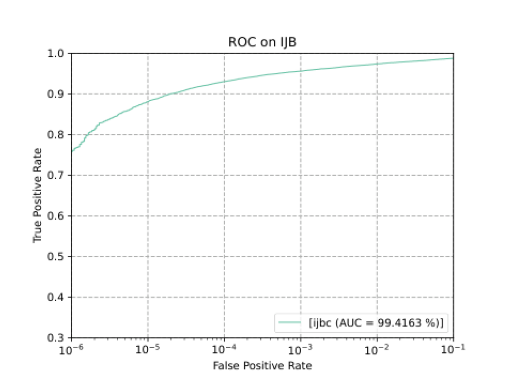

In [53]:
!pip install matplotlib pillow PyMuPDF
import fitz  # PyMuPDF
from PIL import Image
import matplotlib.pyplot as plt

# Open the PDF file
pdf_path = "insightface/ijbc.pdf"
pdf_document = fitz.open(pdf_path)

# Select the page you want to render (e.g., the first page)
page = pdf_document[0]  # 0-based index for the first page

# Render the page as a pixmap (image-like object)
pix = page.get_pixmap()

# Convert the pixmap to a PIL Image
img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide the axis for better visualization
plt.show()


# Retinaface

## Training

### Download Dataset

In [30]:
os.chdir(original_dir)
os.chdir("Retinaface")
# File ID from the URL
file_id = "11UGV3nbVv1x9IC--_tK3Uxf7hA6rlbsS"
# Construct the direct download URL
url = f"https://drive.google.com/uc?id={file_id}"

# Specify the output file name
output = "widerface.zip"

# Download the file
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=11UGV3nbVv1x9IC--_tK3Uxf7hA6rlbsS
From (redirected): https://drive.google.com/uc?id=11UGV3nbVv1x9IC--_tK3Uxf7hA6rlbsS&confirm=t&uuid=dd93ee32-d1cc-450c-a36b-1513fabbbe69
To: /home/viet2005/Documents/at_school/cpv/Facial_Recognition/train_ArcFace/recognition/arcface_torch/RetinaFace/github/Face_Recognition/Retinaface/widerface.zip
100%|██████████| 1.83G/1.83G [05:14<00:00, 5.83MB/s]


'widerface.zip'

In [31]:
# Unzip the file
with zipfile.ZipFile("widerface.zip", "r") as zip_ref:
    zip_ref.extractall("data/")  # Replace with your desired directory

### Training Process

In [36]:
!CUDA_VISIBLE_DEVICES=0,1,2,3 python train.py --network resnet50

/home/viet2005/anaconda3/envs/env-01/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/viet2005/anaconda3/envs/env-01/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Printing net...
RetinaFace(
  (body): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, 

## Evaluation

In [37]:
# File ID from the URL
file_id = "1PNqTx7EZ0M6MyFsCNwvqzlnBtHMQ0VLq"
# Construct the direct download URL
url = f"https://drive.google.com/uc?id={file_id}"

# Specify the output file name
output = "Resnet50_epoch_40.pth"

# Download the file
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1PNqTx7EZ0M6MyFsCNwvqzlnBtHMQ0VLq
From (redirected): https://drive.google.com/uc?id=1PNqTx7EZ0M6MyFsCNwvqzlnBtHMQ0VLq&confirm=t&uuid=06644f64-f352-4f35-ba0b-c225a5763a95
To: /home/viet2005/Documents/at_school/cpv/Facial_Recognition/train_ArcFace/recognition/arcface_torch/RetinaFace/github/Face_Recognition/Retinaface/Resnet50_epoch_40.pth
100%|██████████| 110M/110M [00:16<00:00, 6.54MB/s] 


'Resnet50_epoch_40.pth'

In [39]:
!python test_widerface.py --trained_model Resnet50_epoch_40.pth --network resnet50

/home/viet2005/anaconda3/envs/env-01/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/viet2005/anaconda3/envs/env-01/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Loading pretrained model from Resnet50_epoch_40.pth
/home/viet2005/Documents/at_school/cpv/Facial_Recognition/train_ArcFace/recognition/arcface_torch/RetinaFace/github/Face_Recognition/Retinaface/test_widerface.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses

In [40]:
os.chdir("widerface_evaluate")
!python setup.py build_ext --inplace
!python evaluation.py

Compiling box_overlaps.pyx because it changed.
[1/1] Cythonizing box_overlaps.pyx
/home/viet2005/anaconda3/envs/env-01/lib/python3.12/site-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /home/viet2005/Documents/at_school/cpv/Facial_Recognition/train_ArcFace/recognition/arcface_torch/RetinaFace/github/Face_Recognition/Retinaface/widerface_evaluate/box_overlaps.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
In file included from /home/viet2005/anaconda3/envs/env-01/lib/python3.12/site-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /home/viet2005/anaconda3/envs/env-01/lib/python3.12/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /home/viet2005/anaconda3/envs/env-01/lib/python3.12/site-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from box_overlaps.c:1249:
/home/viet2005/anac

# System Implementation

In [43]:
os.chdir(original_dir)
os.chdir("System_Implementation")
file_id = "1PNqTx7EZ0M6MyFsCNwvqzlnBtHMQ0VLq"
# Construct the direct download URL
url = f"https://drive.google.com/uc?id={file_id}"

# Specify the output file name
output = "Resnet50_epoch_40.pth"

# Download the file
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1PNqTx7EZ0M6MyFsCNwvqzlnBtHMQ0VLq
From (redirected): https://drive.google.com/uc?id=1PNqTx7EZ0M6MyFsCNwvqzlnBtHMQ0VLq&confirm=t&uuid=2f85ac64-5ba6-45d4-8871-44212f48ba59
To: /home/viet2005/Documents/at_school/cpv/Facial_Recognition/train_ArcFace/recognition/arcface_torch/RetinaFace/github/Face_Recognition/System_Implementation/Resnet50_epoch_40.pth
100%|██████████| 110M/110M [00:19<00:00, 5.61MB/s] 


'Resnet50_epoch_40.pth'

In [44]:
!python gui.py

/home/viet2005/Documents/at_school/cpv/Facial_Recognition/train_ArcFace/recognition/arcface_torch/RetinaFace/github/Face_Recognition/System_Implementation/enroll.py:46: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issue